# Laboratorio 1 - Análisis y Modelado de Datos FutAlpes F.C

**Integrantes:**
- Estudiante 1: Daniela Echavarria Yepes - 202111348
- Estudiante 2: Diego Alejandro Molano Roa - 202123015
- Estudiante 3: Juan Manuel Rodriguez Diaz - 202013372


# Introducción y Objetivo

En este laboratorio se construirá un modelo de regresión para estimar el precio de mercado de jugadores de fútbol 
basado en diversas métricas de rendimiento y características. 

El objetivo es:

- Explorar y entender los datos entregados.  
- Preparar los datos mediante limpieza y preprocesamiento.  
- Construir y entrenar un modelo de regresión.  
- Evaluar cuantitativa y cualitativamente el modelo.  
- Exportar el mejor modelo para su uso en producción. 

## Importación de librerías
Para el análisis de datos utilizamos las librerías **pandas**, **numpy**, **matplotlib**, **seaborn** y **sklearn**.  
Estas herramientas permiten la manipulación de datos, visualización de variables y limpieza eficiente del dataset.



In [2]:
# ====================================
# 1. Importación de librerías
# ====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


# Configuración
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


# Carga de datos
Se cargó el archivo `datos_entrenamiento_laboratorio1(train_data).csv` y se exploraron las primeras filas.  
El dataset contiene información de múltiples variables, incluyendo variables numéricas y categóricas.

In [36]:
# ====================================
# 2. Carga de datos
# ====================================
df = pd.read_csv("datos_entrenamiento_laboratorio1(train_data).csv")
print(f"Filas y columnas: {df.shape}")
display(df.head())


Filas y columnas: (57934, 50)


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,€50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,€50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,€1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,€45.00m,30.06.2028


# 1. Descripción del entendimiento de datos

En esta sección se describe la estructura inicial del dataset, explorando:
- Dimensiones
- Tipos de variables
- Valores nulos y duplicados
- Estadísticas descriptivas
- Outliers
- Correlaciones

Esto permite identificar problemas de calidad y comprender la información disponible.


## 1.1 Dimensiones del dataset


In [4]:
print("Dimensiones (filas, columnas):", df.shape)
display(df.head())


Dimensiones (filas, columnas): (57934, 50)


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,€50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,€50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,€1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,€45.00m,30.06.2028


## 1.2 Tipos de datos y valores nulos


In [5]:
# Tipos y nulos (conteo y %)
resumen_calidad = pd.DataFrame({
    'tipo': df.dtypes.astype(str),
    'n_nulos': df.isna().sum(),
    '%_nulos': (df.isna().mean() * 100).round(2),
    'n_unicos': df.nunique(dropna=True)
}).sort_index()

display(resumen_calidad)

print("\nColumnas con nulos (si aplica):")
display(resumen_calidad[resumen_calidad['n_nulos'] > 0])

,tipo,n_nulos,%_nulos,n_unicos
%_de_duelos_aereos_ganados,float64,20957,36.17,79
%_de_regates_exitosos,float64,28722,49.58,54
Acarreos_ultimo_tercio,int64,0,0.00,16
Acciones_que_crean_tiros,int64,0,0.00,16
Centros,int64,0,0.00,24
Dia_partido,object,0,0.00,198
Duelos_aereos_ganados,int64,0,0.00,16
Edad,object,48,0.08,7114
Errores_defnsivos_ocasion_tiro,int64,0,0.00,4
Faltas_cometidas,int64,0,0.00,10



Columnas con nulos (si aplica):


,tipo,n_nulos,%_nulos,n_unicos
%_de_duelos_aereos_ganados,float64,20957,36.17,79
%_de_regates_exitosos,float64,28722,49.58,54
Edad,object,48,0.08,7114
Nacionalidad,object,32,0.06,110
contract_date,object,12916,22.29,11
market_value,object,12894,22.26,95


## 1.3 Estadísticas descriptivas (media, desviación, percentiles, moda)


In [7]:
# Numéricas con percentiles detallados
desc_num = df.select_dtypes(include='number').describe(
    percentiles=[.01, .05, .25, .5, .75, .95, .99]
).T
display(desc_num)

# Categóricas: conteo de categorías y la más frecuente
cats = df.select_dtypes(include=['object','category','bool'])
if cats.shape[1] > 0:
    top_cat = pd.DataFrame({
        'n_unicos': cats.nunique(dropna=True),
        'top': cats.mode(dropna=True).iloc[0],
        'freq_top': cats.apply(lambda s: s.value_counts(dropna=True).iloc[0] if s.notna().any() else np.nan)
    })
    display(top_cat)

# Moda general (puede haber múltiples; se muestra la primera fila)
try:
    moda = df.mode(dropna=True).head(1).T.rename(columns={0:'moda'})
    display(moda)
except Exception as e:
    print("No fue posible calcular la moda:", e)


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Goles,57934.0,0.513015,16.440600,-5.0,0.0,0.0,0.0,0.0,0.0,1.00,1.0,995.0
Tiros Totales,57934.0,0.792402,1.158538,0.0,0.0,0.0,0.0,0.0,1.0,3.00,5.0,12.0
xG,57934.0,0.088635,0.209810,0.0,0.0,0.0,0.0,0.0,0.1,0.50,1.0,2.9
npxG,57934.0,0.080473,0.186549,0.0,0.0,0.0,0.0,0.0,0.1,0.40,0.9,2.9
xAG,57934.0,0.062784,0.152033,0.0,0.0,0.0,0.0,0.0,0.1,0.40,0.8,2.1
xAG.1,57934.0,0.062784,0.152033,0.0,0.0,0.0,0.0,0.0,0.1,0.40,0.8,2.1
Acciones_que_crean_tiros,57934.0,1.416750,1.727395,0.0,0.0,0.0,0.0,1.0,2.0,5.00,7.0,16.0
Pases_intentados,57934.0,31.659716,22.963272,0.0,0.0,3.0,13.0,28.0,45.0,75.00,98.0,171.0
Pases_intentados.1,57934.0,31.659716,22.963272,0.0,0.0,3.0,13.0,28.0,45.0,75.00,98.0,171.0
Pases_intentados.2,57934.0,31.659716,22.963272,0.0,0.0,3.0,13.0,28.0,45.0,75.00,98.0,171.0


,n_unicos,top,freq_top
Jugador,2242,Vitinha,166
Nacionalidad,110,fr FRA,9351
Posicion,452,CB,9537
Edad,7114,24-231,37
Dia_partido,198,"Saturday May 10, 2025",997
market_value,95,€5.00m,2332
contract_date,11,30.06.2028,11316


,moda
Jugador,Vitinha
Nacionalidad,fr FRA
Posicion,CB
Edad,24-231
Dia_partido,"Saturday May 10, 2025"
Goles,0
Tiros Totales,0
xG,0.0
npxG,0.0
xAG,0.0


## 1.4 Variables numéricas y categóricas


In [8]:
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
dt_cols  = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print(f"Numéricas ({len(num_cols)}):", num_cols)
print(f"Categóricas ({len(cat_cols)}):", cat_cols)
print(f"Fechas/tiempo ({len(dt_cols)}):", dt_cols)


Numéricas (43): ['Goles', 'Tiros Totales', 'xG', 'npxG', 'xAG', 'xAG.1', 'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_intentados.1', 'Pases_intentados.2', 'Pases_progresivos', 'Pases_progresivos.1', 'Regates_exitosos', 'Regates_exitosos.1', 'Pases_medios_completados', 'Pases_largos_completados', 'xAG.2', 'xAG.3', 'xA', 'Pases_en_ultimo_tercio', 'Pases_balon_vivo', 'Pases_balon_muerto', 'Pases_al_hueco', 'Pases_centros', 'Pases_completados', 'Pases_completados.1', 'Pases_completados.2', 'Pases_fuera_de_juego', 'Valla_no_vencida', 'Errores_defnsivos_ocasion_tiro', 'Toques_en_zona_ofensiva', 'Toques_en_area_rival', '%_de_regates_exitosos', 'Veces_que_fue_barrido_regate', 'Acarreos_ultimo_tercio', 'Malos_controles', 'Perdida_balon', 'Pases_recibidos', 'Pases_progresivos_recibidos', 'Faltas_cometidas', 'Centros', 'Duelos_aereos_ganados', '%_de_duelos_aereos_ganados']
Categóricas (7): ['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Dia_partido', 'market_value', 'contract_date']
Fe

## 1.5 Distribución de Variables Numéricas

<Figure size 2000x2000 with 0 Axes>

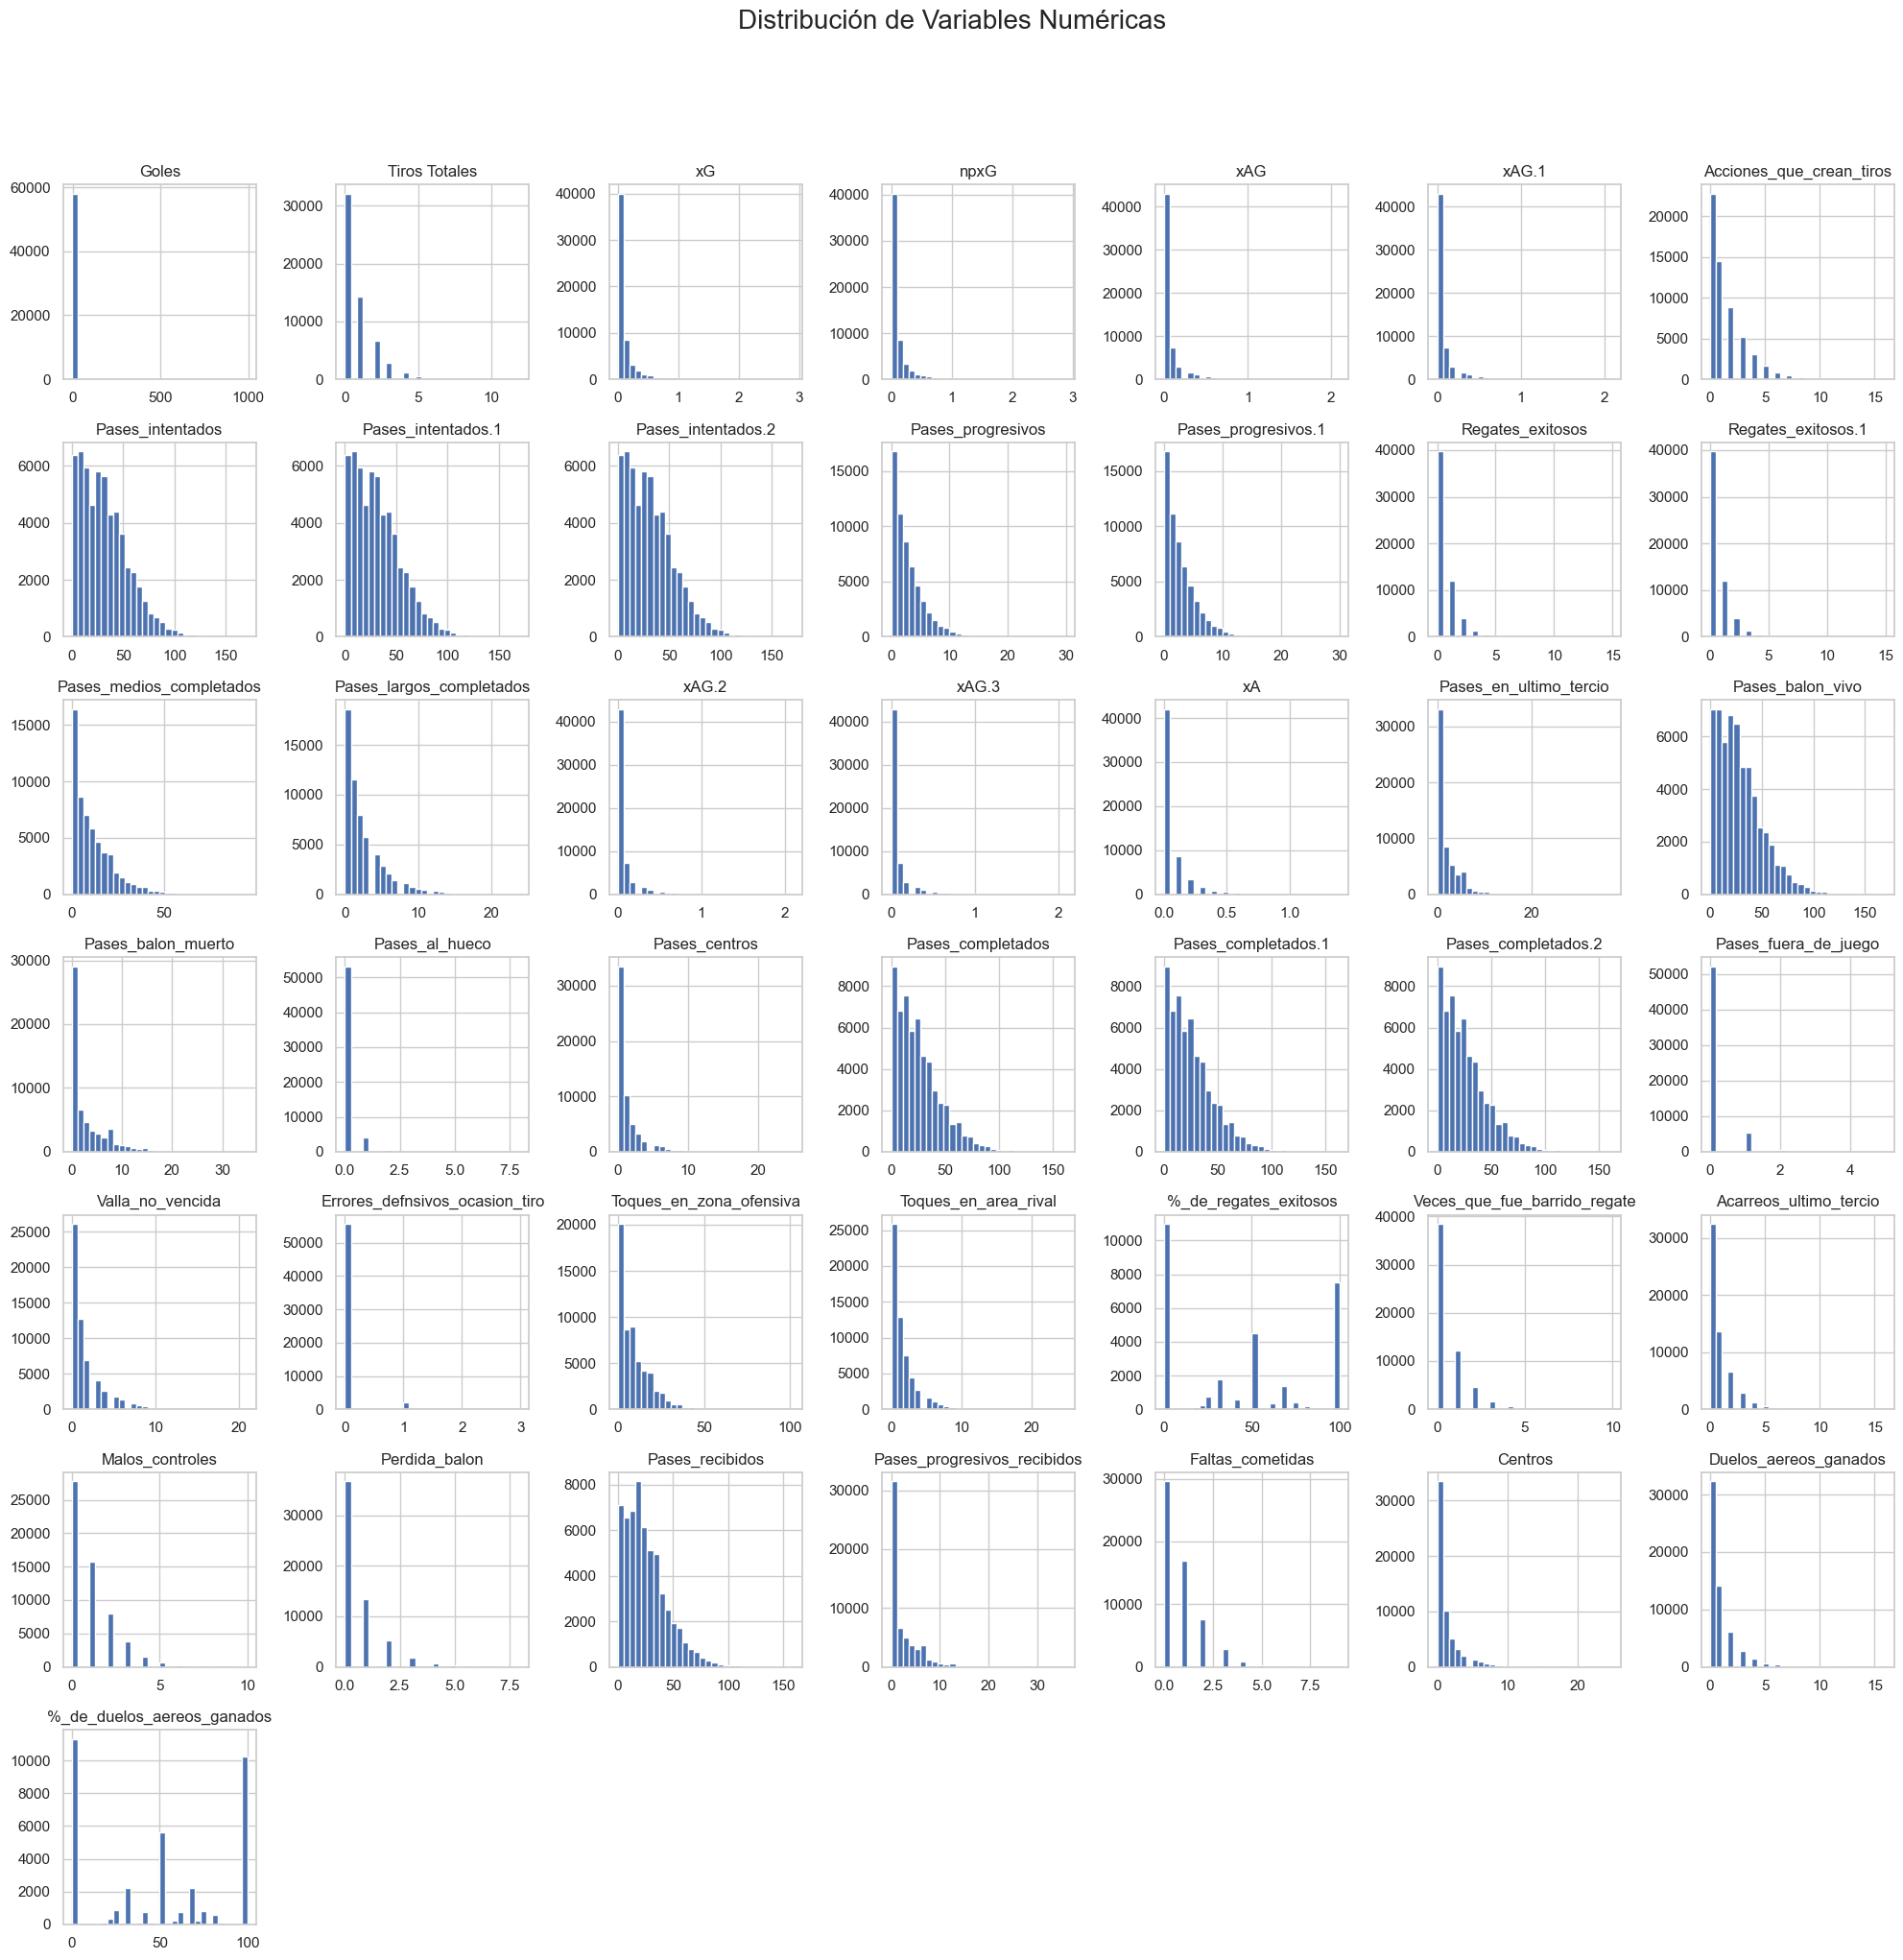

In [9]:
# Histogramas para atributos numéricos

fig = plt.figure(figsize=(20, 20))
df[num_cols].hist(bins=30, figsize=(20, 20))
plt.suptitle("Distribución de Variables Numéricas", fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Las distribuciones de las variables numéricas muestran que la mayoría de los valores están muy concentrados en cero y solo unos pocos casos alcanzan cifras altas, lo que genera una fuerte asimetría hacia la derecha. Esto ocurre principalmente en las métricas ofensivas como goles, tiros, goles esperados, asistencias esperadas y centros. 

En contraste, variables relacionadas con pases y toques presentan mayor dispersión aunque también con sesgo hacia valores bajos. Finalmente, las variables expresadas en porcentaje, como éxito en regates o duelos aéreos, muestran una distribución más equilibrada en todo el rango de valores. En conjunto, los datos reflejan la realidad del fútbol: muchos jugadores participan poco en métricas destacadas y unos pocos concentran el rendimiento, lo que explica la gran cantidad de valores atípicos observados.

## 1.6 Outliers (IQR y boxplots)


Tabla de outliers por variable:


,Q1,Q3,IQR,lim_inf,lim_sup,n_outliers,%_outliers
Centros,0.0,1.0,1.0,-1.50,2.50,9183.0,15.850796
Pases_centros,0.0,1.0,1.0,-1.50,2.50,9183.0,15.850796
Malos_controles,0.0,1.0,1.0,-1.50,2.50,6369.0,10.993544
xG,0.0,0.1,0.1,-0.15,0.25,6266.0,10.815756
npxG,0.0,0.1,0.1,-0.15,0.25,5872.0,10.135672
Pases_fuera_de_juego,0.0,0.0,0.0,0.00,0.00,5780.0,9.976870
Duelos_aereos_ganados,0.0,1.0,1.0,-1.50,2.50,5533.0,9.550523
Acarreos_ultimo_tercio,0.0,1.0,1.0,-1.50,2.50,5157.0,8.901509
Tiros Totales,0.0,1.0,1.0,-1.50,2.50,4926.0,8.502779
Pases_al_hueco,0.0,0.0,0.0,0.00,0.00,4838.0,8.350882


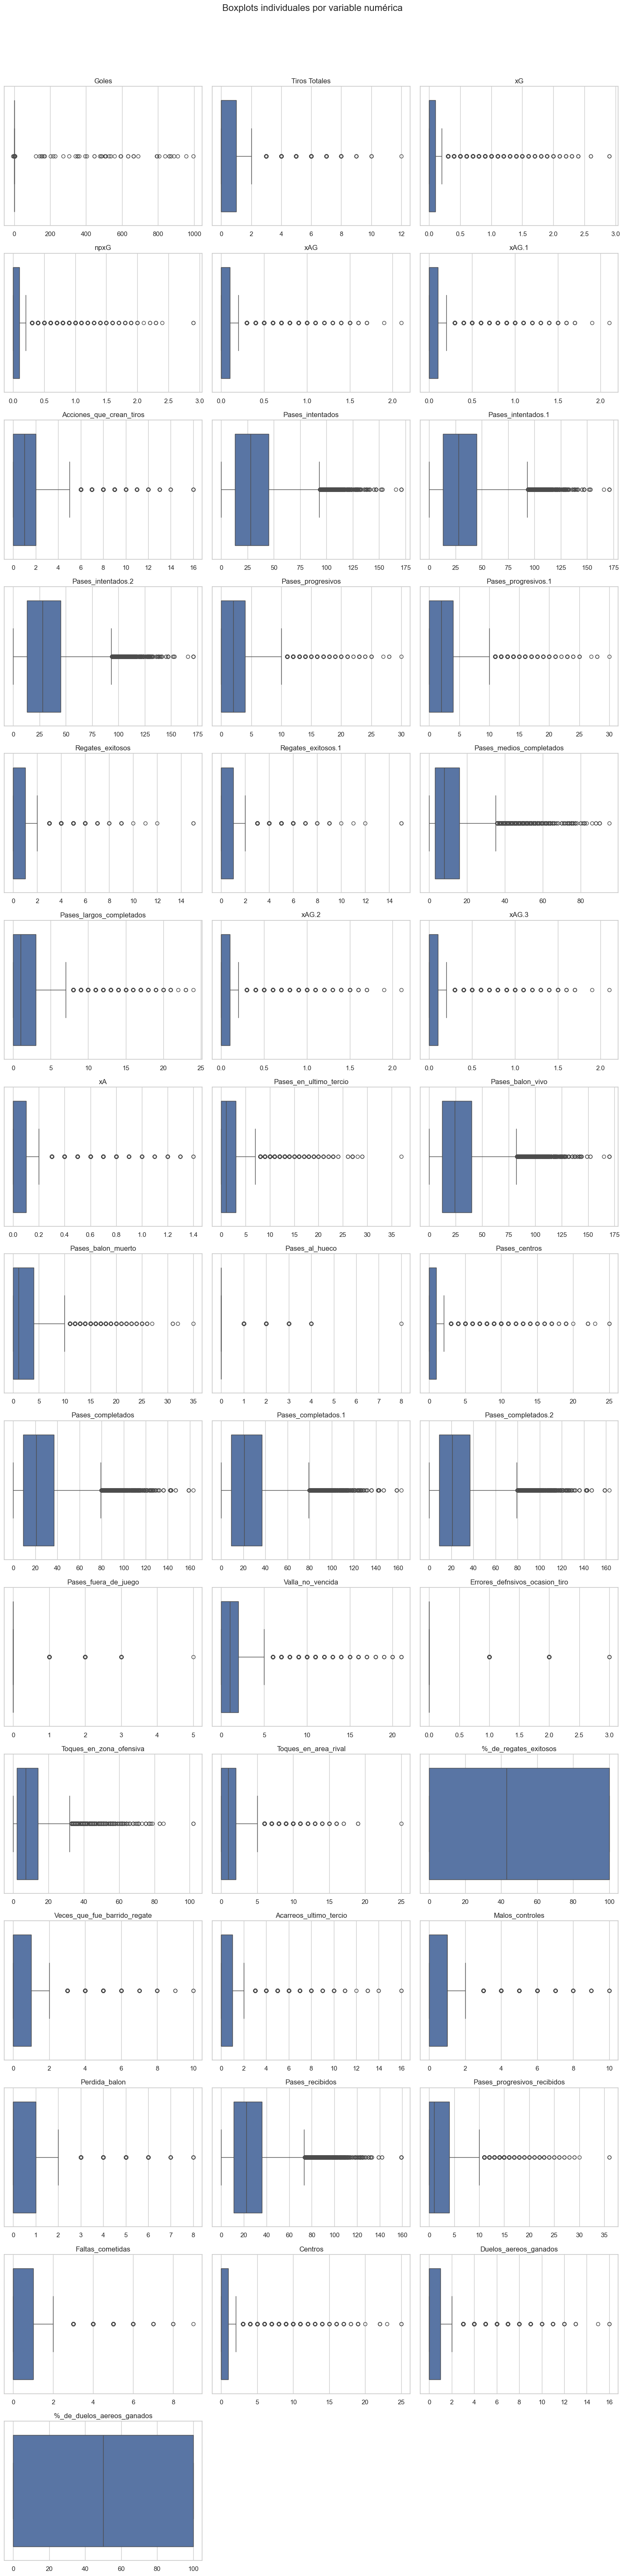

In [10]:
# ==========================================
# Outliers por IQR + Boxplots individuales
# ==========================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Función para calcular estadísticas de outliers por IQR
def outlier_stats(s: pd.Series):
    s = s.dropna()
    if s.empty: 
        return pd.Series({'Q1':np.nan, 'Q3':np.nan, 'IQR':np.nan, 
                          'lim_inf':np.nan, 'lim_sup':np.nan, 
                          'n_outliers':0, '%_outliers':0.0})
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5*iqr
    lim_sup = q3 + 1.5*iqr
    n_out = ((s < lim_inf) | (s > lim_sup)).sum()
    pct_out = 100 * n_out / s.size
    return pd.Series({'Q1':q1, 'Q3':q3, 'IQR':iqr, 
                      'lim_inf':lim_inf, 'lim_sup':lim_sup, 
                      'n_outliers':n_out, '%_outliers':pct_out})

# Seleccionamos variables numéricas
num_df = df.select_dtypes(include='number')

if num_df.shape[1] > 0:
    # Tabla de outliers
    tabla_outliers = num_df.apply(outlier_stats, axis=0).T.sort_values('%_outliers', ascending=False)
    print("Tabla de outliers por variable:")
    display(tabla_outliers)

    # Boxplots individuales en grilla
    n = len(num_df.columns)
    ncols = 3
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
    axes = axes.flatten()

    for i, col in enumerate(num_df.columns):
        sns.boxplot(x=num_df[col], ax=axes[i], showfliers=True)
        axes[i].set_title(col, fontsize=12)
        axes[i].set_xlabel("")  

    # Desactivar ejes vacíos
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    fig.suptitle("Boxplots individuales por variable numérica", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("No hay variables numéricas para evaluar outliers.")


## 1.7 Relaciones con Variable Objetivo

In [38]:

def parse_market_value(val):
    try:
        if pd.isna(val):
            return np.nan
        val = str(val).replace("€", "").replace(",", "").strip().lower()

        if val in ["-", "", "nan", "none", "error"]:
            return np.nan

        if val.endswith("m"):   # millones
            return float(val[:-1]) * 1e6
        elif val.endswith("k"): # miles
            return float(val[:-1]) * 1e3
        else:                   # número plano
            return float(val)
    except:
        return np.nan

# Aplicar al DataFrame
df["market_value_num"] = df["market_value"].apply(parse_market_value)

# Escalamos en millones para visualización
df["market_value_millions"] = df["market_value_num"] / 1e6

print(df[["market_value", "market_value_num", "market_value_millions"]].head())


  market_value  market_value_num  market_value_millions
0      €50.00m      5.000000e+07                   50.0
1      €50.00m      5.000000e+07                   50.0
2            -               NaN                    NaN
3    €1000.00m      1.000000e+09                 1000.0
4      €45.00m      4.500000e+07                   45.0


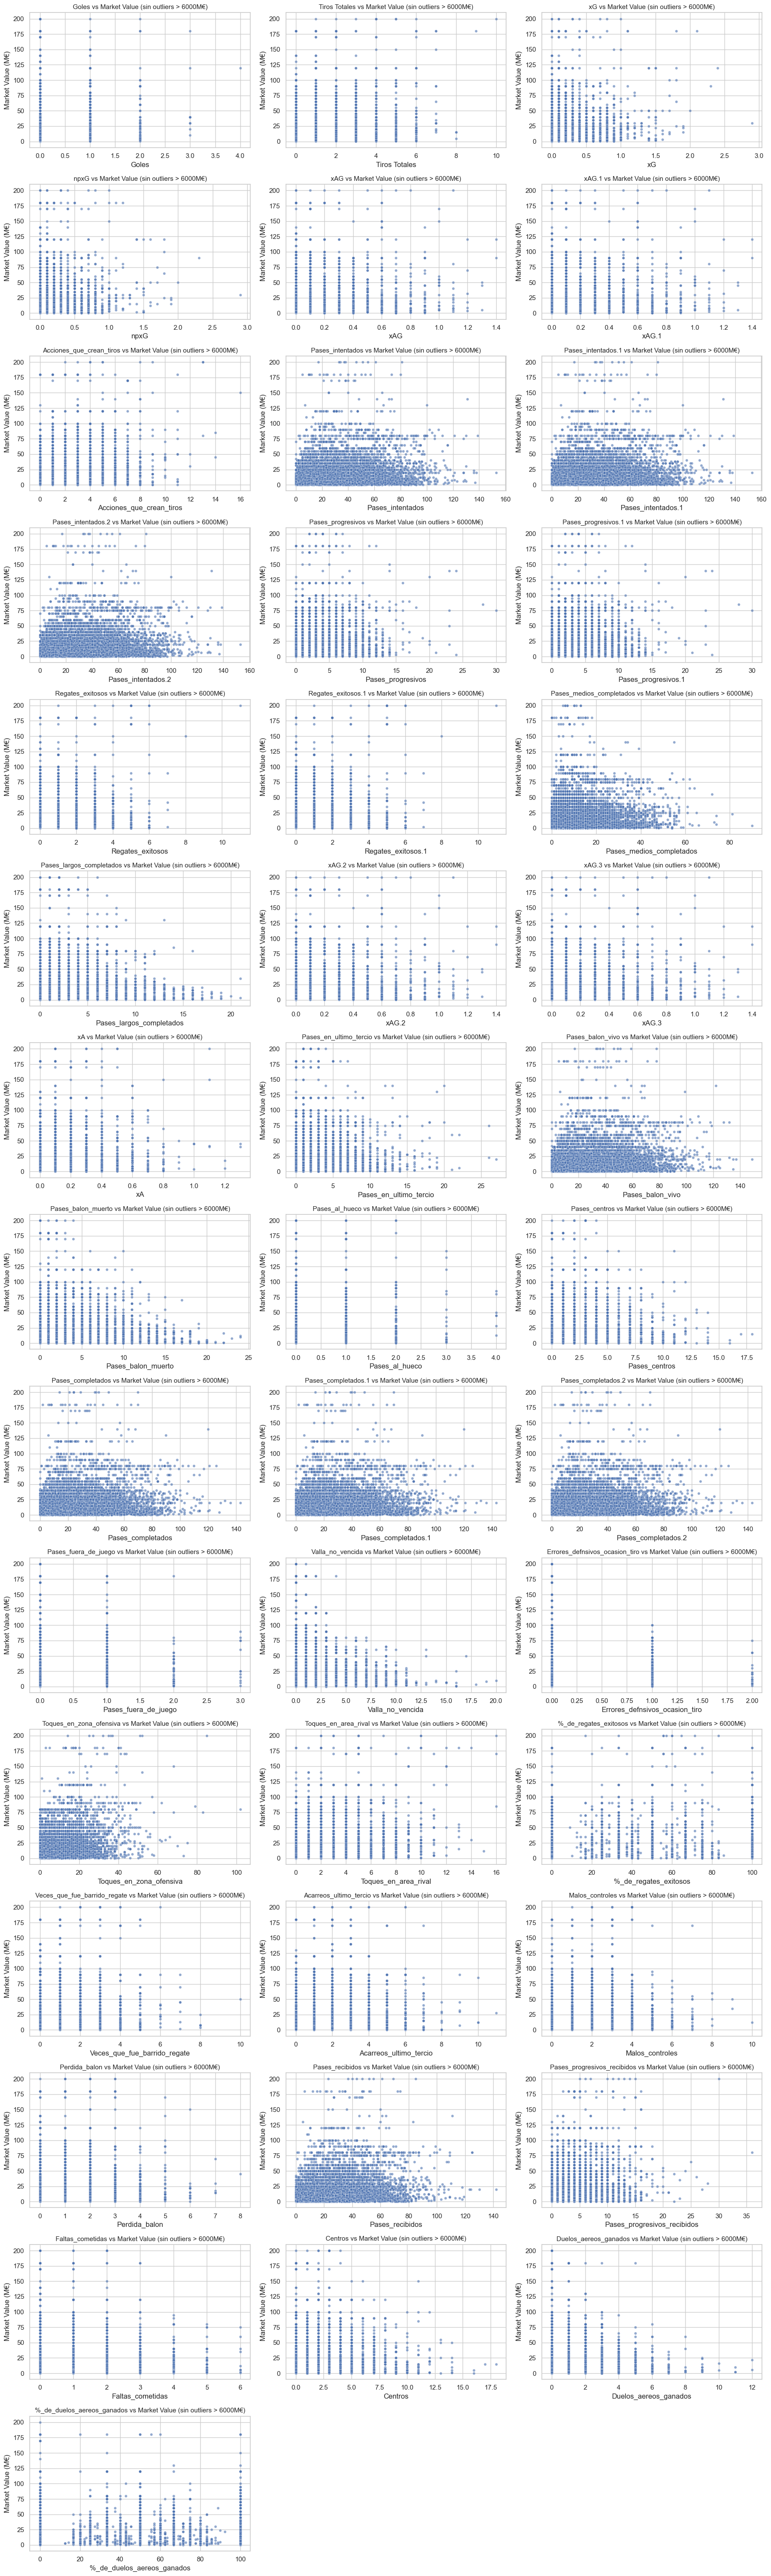

In [39]:
# Filtrar: eliminar valores de market_value_millions mayores a 6000
df_filtrado = df[df["market_value_millions"] < 6000]

# Definir número de columnas y filas para la grilla
n = len(num_cols)
ncols = 3   # puedes cambiarlo a 2 o 4 según lo que prefieras
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows))
axes = axes.flatten()

# Graficar scatterplots
for i, col in enumerate(num_cols):
    sns.scatterplot(
        data=df_filtrado.sample(frac=0.2, random_state=42), 
        x=col, 
        y="market_value_millions",
        s=20, alpha=0.6, ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Market Value (sin outliers > 6000M€)", fontsize=11)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Market Value (M€)")

# Desactivar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## 1.8 Correlación (heatmap y pares fuertemente correlacionados)


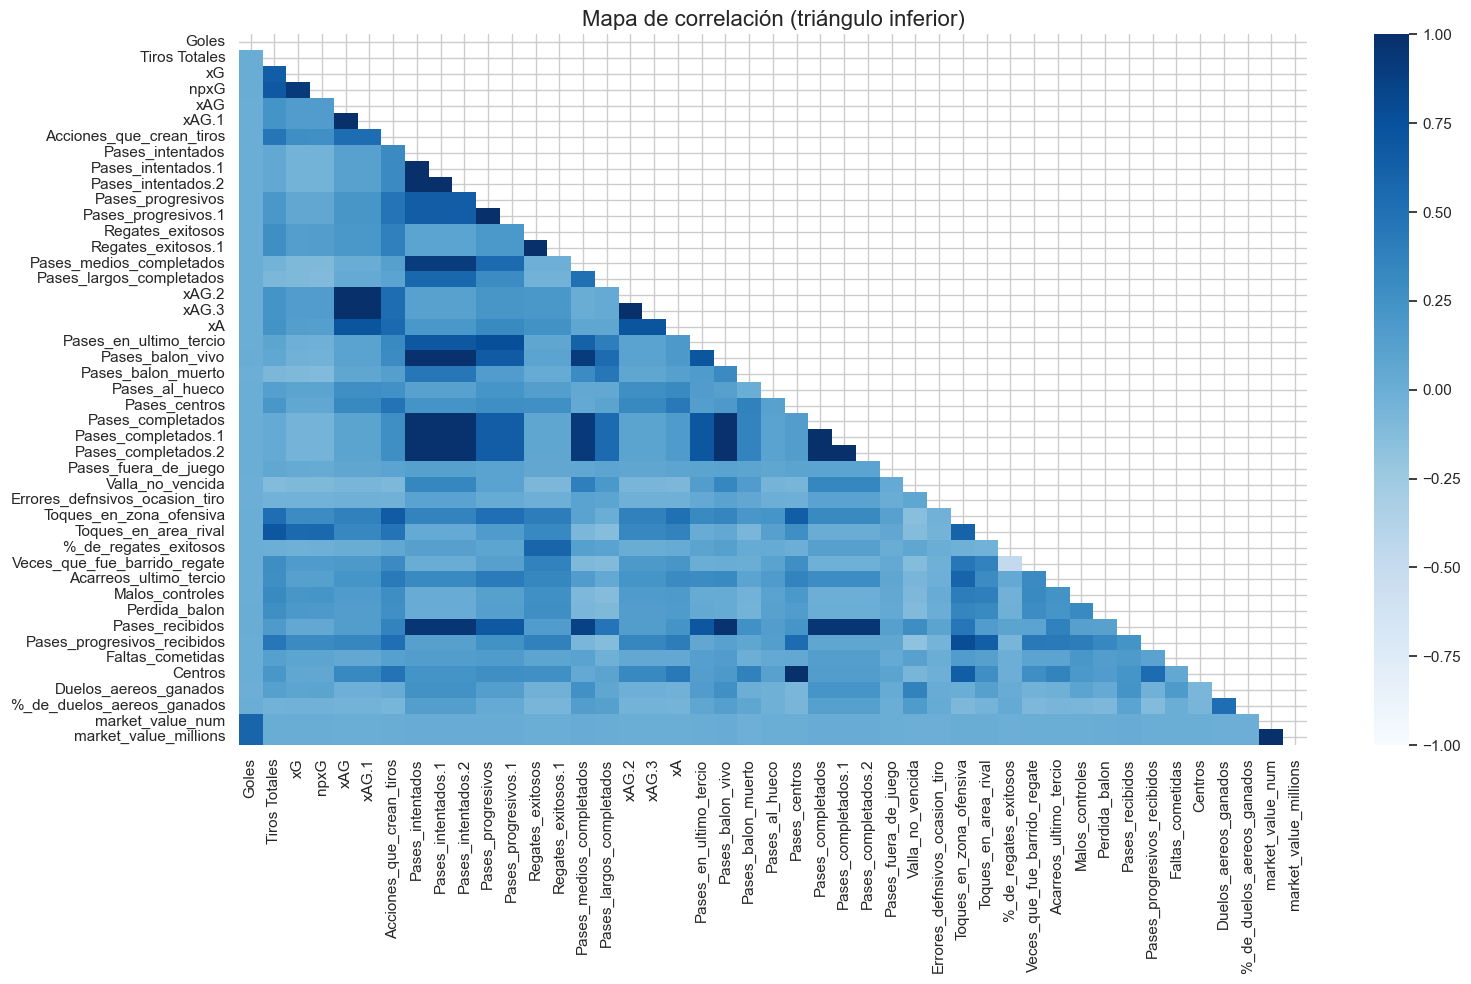

Pares con correlación fuerte (|r| > 0.8):


,Variable_1,Variable_2,Correlación
989,market_value_num,market_value_millions,1.000000
181,xAG,xAG.2,1.000000
170,xAG,xAG.1,1.000000
221,xAG.1,xAG.3,1.000000
220,xAG.1,xAG.2,1.000000
287,Pases_intentados,Pases_intentados.1,1.000000
182,xAG,xAG.3,1.000000
324,Pases_intentados.1,Pases_intentados.2,1.000000
584,xAG.2,xAG.3,1.000000
775,Pases_centros,Centros,1.000000


In [98]:
num_cols = df.select_dtypes(include='number').columns.tolist()

if len(num_cols) >= 2:
    # Matriz de correlación
    corr = df[num_cols].corr()

    # Heatmap (solo triángulo inferior)
    plt.figure(figsize=(16,10))
    mask = np.triu(np.ones_like(corr, dtype=bool))  # oculta triángulo superior
    sns.heatmap(corr, mask=mask, cmap="Blues", vmin=-1, vmax=1, cbar=True, annot=False)
    plt.title("Mapa de correlación (triángulo inferior)", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Extraer pares de variables altamente correlacionadas
    high_corr = (
        corr.where(~np.tril(np.ones(corr.shape)).astype(bool))  # tomar solo triángulo inferior
        .stack()  # convertimos a formato largo (pares)
        .reset_index()
    )

    high_corr.columns = ["Variable_1", "Variable_2", "Correlación"]

    # Filtrar correlaciones fuertes
    high_corr = high_corr[high_corr["Correlación"].abs() > 0.8]

    # Mostrar
    print("Pares con correlación fuerte (|r| > 0.8):")
    display(high_corr.sort_values(by="Correlación", ascending=False))
else:
    print("No hay suficientes variables numéricas para calcular correlación.")


## 1.9 Calidez de Datos

In [13]:
#Completitud
df.isnull().sum() / df.shape[0]

Jugador                           0.000000
Nacionalidad                      0.000552
Posicion                          0.000000
Edad                              0.000829
Dia_partido                       0.000000
Goles                             0.000000
Tiros Totales                     0.000000
xG                                0.000000
npxG                              0.000000
xAG                               0.000000
xAG.1                             0.000000
Acciones_que_crean_tiros          0.000000
Pases_intentados                  0.000000
Pases_intentados.1                0.000000
Pases_intentados.2                0.000000
Pases_progresivos                 0.000000
Pases_progresivos.1               0.000000
Regates_exitosos                  0.000000
Regates_exitosos.1                0.000000
Pases_medios_completados          0.000000
Pases_largos_completados          0.000000
xAG.2                             0.000000
xAG.3                             0.000000
xA         

Casi la mitad de los datos de %_de_regates_exitosos estan vacios y %_de_duelos_aereos_ganados también tiene un porcentaje considerable de datos vacios.

In [16]:
#Unicidad
duplicated_rows = df.loc[df.duplicated( keep=False)]
duplicated_rows

# Número total de filas
total_filas = len(df)

# Número de filas duplicadas (excluyendo la primera aparición)
num_duplicadas = df.duplicated().sum()

# Porcentaje de duplicadas
porcentaje_duplicadas = (num_duplicadas / total_filas) * 100

print(f"Total de filas: {total_filas}")
print(f"Filas duplicadas: {num_duplicadas}")
print(f"Porcentaje de duplicadas: {porcentaje_duplicadas:.2f}%")

Total de filas: 57934
Filas duplicadas: 10483
Porcentaje de duplicadas: 18.09%


**Validez**

Existen problemas de validez en algunas variables como en la variable objetivo market_value se supone que es un float, pero en realidad es un objeto y será necesaria modificarla para poder realizar la regresión. Asimismo, la edad que tiene un slash y un número adicional, este se deberá retirar para obtener un entero.

In [ ]:
#Consistencia
for col in df.select_dtypes(include=["object", "category"]).columns:
    print(f"\nColumna: {col}")
    print(df[col].unique())


Columna: Jugador
['Bruno Fernandes' 'Marcus Rashford' 'Amad Diallo' ... 'Bradley Locko'
 'Teo Barisic' 'Melvin Zinga']

Columna: Nacionalidad
['pt POR' 'eng ENG' 'ci CIV' 'ar ARG' 'nl NED' 'sct SCO' 'br BRA'
 'nir NIR' 'ma MAR' 'cm CMR' 'mx MEX' 'ng NGA' 'es ESP' 'wls WAL' 'rs SRB'
 'us USA' 'fr FRA' 'de GER' 'iq IRQ' 'au AUS' 'ie IRL' 'eg EGY' 'cd COD'
 'co COL' 'hu HUN' 'gr GRE' 'se SWE' 'ch SUI' 'cl CHI' 'jp JPN' 'pl POL'
 'gw GNB' 'jm JAM' 'ml MLI' 'sn SEN' 'ua UKR' 'gm GAM' 'ec ECU' 'nz NZL'
 'be BEL' 'gh GHA' 'bf BFA' 'ca CAN' 'dk DEN' 'no NOR' 'kr KOR' 'ga GAB'
 'dz ALG' 'cz CZE' 'it ITA' 'hr CRO' 'uy URU' 'py PAR' 'xk KVX' 'ro ROU'
 'bd BAN' 'tr TUR' 'zm ZAM' 'al ALB' 'sk SVK' 'is ISL' 'ms MSR' 'uz UZB'
 'zw ZIM' 'at AUT' nan 'do DOM' 'tg TOG' 've VEN' 'gn GUI' 'pe PER'
 'ge GEO' 'sr SUR' 'ao ANG' 'gq EQG' 'ee EST' 'mz MOZ' 'si SVN' 'mk MKD'
 'cv CPV' 'sl SLE' 'pr PUR' 'ru RUS' 'my MAS' 'am ARM' 'ir IRN' 'cy CYP'
 'me MNE' 'fi FIN' 'tn TUN' 'ba BIH' 'id IDN' 'cg CGO' 'lt LTU' 

Se puede ver que hay varios problemas en market ya que no hay un mismo formato existen valores como "€50.00m", "€300k", "€9999.99m",
"error" o "-" (datos inválidos). Esto se podria solucionar convirtiendo todos a millones

# 2. Descripción del proceso de selección de variables 

Con base en la exploración y análisis de correlación, se identifican variables redundantes o duplicadas,
y se definen las variables candidatas para el modelado.


# Conclusiones sobre la correlación de variables

Del gráfico de correlación se observa que algunas variables presentan **correlaciones perfectas (=1)** entre sí, lo que indica que son duplicadas o derivadas:
- **xAG**, **xAG.1**, **xAG.2**, **xAG.3**
- **Pases_intentados**, **Pases_intentados.1**, **Pases_intentados.2**
- **Pases_completados**, **Pases_completados.1**, **Pases_completados.2**
- **Regates_exitosos**, **Regates_exitosos.1**

Existen además variables **fuertemente correlacionadas (|r| > 0.8)** que generan redundancia de información, por ejemplo:
- **Pases_intentados** ↔ **Pases_balon_vivo**
- **Pases_balon_vivo** ↔ **Pases_completados**
- **Pases_completados** ↔ **Pases_recibidos**
- **Pases_intentados** ↔ **Pases_medios_completados**
- **xG** ↔ **npxG**

---

Dado lo anterior, se recomienda eliminar las variables duplicadas o altamente correlacionadas y conservar un subconjunto representativo que mantenga la mayor información posible sin redundancias.

---

## Posibles variables a conservar para el modelo (con menor redundancia):

- Goles
- Tiros Totales
- xG
- xAG
- Acciones_que_crean_tiros
- Pases_progresivos
- Regates_exitosos
- Pases_largos_completados
- Pases_en_ultimo_tercio
- Pases_balon_muerto
- Pases_al_hueco
- Pases_centros
- Valla_no_vencida
- Errores_defnsivos_ocasion_tiro
- Toques_en_zona_ofensiva
- Toques_en_area_rival
- % de regates exitosos
- Veces que fue barrido regate
- Acarreos en último tercio
- Malos controles
- Pérdida de balón
- Pases progresivos recibidos
- Faltas cometidas
- Duelos aéreos ganados
- % de duelos aéreos ganados

# 3. Descripción e implementación del proceso de preparación de datos (incluye la limpieza de datos)
En esta etapa se realiza la **limpieza y preparación del dataset** para que pueda ser utilizado en la construcción de modelos.
Incluye la detección y tratamiento de valores nulos, duplicados, variables redundantes, outliers y la selección final de variables.

## 3.1 Tratamiento de valores duplicados


In [40]:
# Eliminamos filas duplicadas
n_antes = df.shape[0]
df = df.drop_duplicates()
n_despues = df.shape[0]

print(f"Filas eliminadas por duplicados: {n_antes - n_despues}")

Filas eliminadas por duplicados: 10483


## 3.2 Tratamiento de valores nulos


In [41]:
# Revisamos nulos iniciales
print("Valores nulos por variable (antes de imputar):")
nulos_iniciales = df.isna().sum()
display(nulos_iniciales[nulos_iniciales > 0])

# Imputación simple (mediana en numéricas, moda en categóricas)
for col in df.select_dtypes(include='number').columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object', 'category']).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Revisamos nulos finales
print("\n Valores nulos por variable (después de imputar):")
nulos_finales = df.isna().sum()
display(nulos_finales[nulos_finales > 0])

print(f"\nTotal de valores nulos después de imputación: {df.isna().sum().sum()}")


Valores nulos por variable (antes de imputar):


Nacionalidad                     31
Edad                             39
%_de_regates_exitosos         23743
%_de_duelos_aereos_ganados    16984
market_value                  10072
contract_date                 10094
market_value_num              10217
market_value_millions         10217
dtype: int64


 Valores nulos por variable (después de imputar):


C:\Users\Daniela\AppData\Local\Temp\ipykernel_21564\575341681.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())
C:\Users\Daniela\AppData\Local\Temp\ipykernel_21564\575341681.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())
C:\Users\Daniela\AppData\Local\Temp\ipykernel_21564\575341681.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Series([], dtype: int64)


Total de valores nulos después de imputación: 0


## 3.3 Eliminación de variables duplicadas y altamente correlacionadas


In [42]:
# Eliminamos columnas duplicadas (ejemplo con correlación perfecta)
cols_drop = ["xAG.1","xAG.2","xAG.3",
             "Pases_intentados.1","Pases_intentados.2",
             "Pases_completados.1","Pases_completados.2",
             "Regates_exitosos.1"]

df.drop(columns=cols_drop, inplace=True, errors="ignore")
print(f"Variables eliminadas por redundancia: {cols_drop}")


Variables eliminadas por redundancia: ['xAG.1', 'xAG.2', 'xAG.3', 'Pases_intentados.1', 'Pases_intentados.2', 'Pases_completados.1', 'Pases_completados.2', 'Regates_exitosos.1']


C:\Users\Daniela\AppData\Local\Temp\ipykernel_21564\1571133190.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=cols_drop, inplace=True, errors="ignore")


## 3.4 Multi-hot encoding de Posición

Creación de dummies con el fin de identificar jugadores con múltiples posiciones por partido.

In [47]:
df_pos = df[["Jugador", "Posicion"]].copy()

df_pos["Posicion_split"] = (
    df_pos["Posicion"]
    .astype(str)
    .str.replace(r"\s+", "", regex=True)
    .str.split(",")
)

df_pos_explotado = df_pos["Posicion_split"].explode()

posiciones_unicas = sorted(df_pos_explotado.dropna().unique())
print("Posiciones únicas encontradas:", posiciones_unicas)

dummies = pd.get_dummies(df_pos_explotado, prefix="", prefix_sep="")
dummies_agrupados = dummies.groupby(level=0).max()
df_multi_hot = df.join(dummies_agrupados).fillna(0)

pos_cols = [c for c in df_multi_hot.columns if c in posiciones_unicas]
df_multi_hot[pos_cols] = df_multi_hot[pos_cols].astype(int)

print("Dimensiones con multi-hot por fila:", df_multi_hot.shape)
display(df_multi_hot.head())

Posiciones únicas encontradas: ['AM', 'CB', 'CM', 'DM', 'FW', 'GK', 'LB', 'LM', 'LW', 'RB', 'RM', 'RW', 'WB']
Dimensiones con multi-hot por fila: (47451, 60)


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date,market_value_num,market_value_millions,Edad_num,nac_code,nac_iso,AM,CB,CM,DM,FW,GK,LB,LM,LW,RB,RM,RW,WB
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,2,60,6,6,1,14,4,0.0,4,51,8,0,8,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,€50.00m,30.06.2027,5.000000e+07,50.0,29.939726,pt,POR,1,0,0,0,1,0,0,0,0,0,0,0,0
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,1,30,2,2,0,2,1,0.1,2,30,0,0,1,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,€50.00m,30.06.2026,5.000000e+07,50.0,26.794521,eng,ENG,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,1,33,1,1,1,6,1,0.1,1,28,4,0,2,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027,1.000000e+07,10.0,22.098630,ci,CIV,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,1,33,1,1,1,6,1,0.1,1,28,4,0,2,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,€1000.00m,30.06.2030,1.000000e+09,1000.0,22.098630,ci,CIV,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,3,11,0,0,0,3,0,0.1,0,11,0,0,1,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,€45.00m,30.06.2028,4.500000e+07,45.0,20.126027,ar,ARG,0,0,0,0,0,0,0,0,0,0,0,1,0


## 3.5 Tratamiento Columna Edad y Nacionalidad

In [ ]:

def parse_edad(valor):
    try:
        if pd.isna(valor):  
            return np.nan
        partes = valor.split("-")
        años = int(partes[0])
        return años 
    except:
        return np.nan

# Aplicar la función a la columna Edad
df["Edad_num"] = df["Edad"].apply(parse_edad)

# Verificar
print(df[["Edad", "Edad_num"]].head(10))

# Separar en dos columnas: antes y después del espacio
df[["nac_code", "nac_iso"]] = df["Nacionalidad"].str.split(" ", n=1, expand=True)

# Verificar
print(df[["Nacionalidad", "nac_code", "nac_iso"]].head(10))



     Edad   Edad_num
0  29-343  29.939726
1  26-290  26.794521
2  22-036  22.098630
3  22-036  22.098630
4  20-046  20.126027
5  25-219  25.600000
6  23-086  23.235616
7  19-119  19.326027
8  27-252  27.690411
9  32-175  32.479452
  Nacionalidad nac_code nac_iso
0       pt POR       pt     POR
1      eng ENG      eng     ENG
2       ci CIV       ci     CIV
3       ci CIV       ci     CIV
4       ar ARG       ar     ARG
5      eng ENG      eng     ENG
6       nl NED       nl     NED
7      eng ENG      eng     ENG
8      sct SCO      sct     SCO
9       br BRA       br     BRA


C:\Users\Daniela\AppData\Local\Temp\ipykernel_21564\3713936638.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Edad_num"] = df["Edad"].apply(parse_edad)
C:\Users\Daniela\AppData\Local\Temp\ipykernel_21564\3713936638.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["nac_code", "nac_iso"]] = df["Nacionalidad"].str.split(" ", n=1, expand=True)
C:\Users\Daniela\AppData\Local\Temp\ipykernel_21564\3713936638.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

## 3.6 Multi-hot Encoding Nacionalidad

In [49]:
# 2) One-hot encoding de nacionalidad
nac_dummies = pd.get_dummies(df["nac_iso"], prefix="NAC")

# 3) Unir al DataFrame original y rellenar NaN
df_multi_hot = pd.concat([df_multi_hot, nac_dummies], axis=1).fillna(0)

# 4) Asegurar 0/1 (int) en dummies
nac_cols = [c for c in df_multi_hot.columns if c.startswith("NAC_")]
df_multi_hot[nac_cols] = df_multi_hot[nac_cols].astype(int)

print("Columnas dummies de nacionalidad:", nac_cols)
print("Dimensiones con multi-hot por fila:", df_multi_hot.shape)
display(df_multi_hot.head())

nac_cols = [c for c in df_multi_hot.columns if c.startswith("NAC_")]
print("Columnas de nacionalidad:", nac_cols[:10])  # muestra las primeras 10



Columnas dummies de nacionalidad: ['NAC_ALB', 'NAC_ALG', 'NAC_ANG', 'NAC_ARG', 'NAC_ARM', 'NAC_AUS', 'NAC_AUT', 'NAC_BAN', 'NAC_BDI', 'NAC_BEL', 'NAC_BEN', 'NAC_BFA', 'NAC_BIH', 'NAC_BRA', 'NAC_CAN', 'NAC_CGO', 'NAC_CHI', 'NAC_CIV', 'NAC_CMR', 'NAC_COD', 'NAC_COL', 'NAC_COM', 'NAC_CPV', 'NAC_CRO', 'NAC_CTA', 'NAC_CYP', 'NAC_CZE', 'NAC_DEN', 'NAC_DOM', 'NAC_ECU', 'NAC_EGY', 'NAC_ENG', 'NAC_EQG', 'NAC_ESP', 'NAC_EST', 'NAC_FIN', 'NAC_FRA', 'NAC_GAB', 'NAC_GAM', 'NAC_GEO', 'NAC_GER', 'NAC_GHA', 'NAC_GLP', 'NAC_GNB', 'NAC_GRE', 'NAC_GUF', 'NAC_GUI', 'NAC_HAI', 'NAC_HUN', 'NAC_IDN', 'NAC_IRL', 'NAC_IRN', 'NAC_IRQ', 'NAC_ISL', 'NAC_ISR', 'NAC_ITA', 'NAC_JAM', 'NAC_JOR', 'NAC_JPN', 'NAC_KEN', 'NAC_KOR', 'NAC_KSA', 'NAC_KVX', 'NAC_LBY', 'NAC_LTU', 'NAC_MAD', 'NAC_MAR', 'NAC_MAS', 'NAC_MDA', 'NAC_MEX', 'NAC_MKD', 'NAC_MLI', 'NAC_MLT', 'NAC_MNE', 'NAC_MOZ', 'NAC_MSR', 'NAC_MTQ', 'NAC_NED', 'NAC_NGA', 'NAC_NIR', 'NAC_NOR', 'NAC_NZL', 'NAC_PAN', 'NAC_PAR', 'NAC_PER', 'NAC_POL', 'NAC_POR', 'NAC_PUR

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date,market_value_num,market_value_millions,Edad_num,nac_code,nac_iso,AM,CB,CM,DM,FW,GK,LB,LM,LW,RB,RM,RW,WB,NAC_ALB,NAC_ALG,NAC_ANG,NAC_ARG,NAC_ARM,NAC_AUS,NAC_AUT,NAC_BAN,NAC_BDI,NAC_BEL,NAC_BEN,NAC_BFA,NAC_BIH,NAC_BRA,NAC_CAN,NAC_CGO,NAC_CHI,NAC_CIV,NAC_CMR,NAC_COD,NAC_COL,NAC_COM,NAC_CPV,NAC_CRO,NAC_CTA,NAC_CYP,NAC_CZE,NAC_DEN,NAC_DOM,NAC_ECU,NAC_EGY,NAC_ENG,NAC_EQG,NAC_ESP,NAC_EST,NAC_FIN,NAC_FRA,NAC_GAB,NAC_GAM,NAC_GEO,NAC_GER,NAC_GHA,NAC_GLP,NAC_GNB,NAC_GRE,NAC_GUF,NAC_GUI,NAC_HAI,NAC_HUN,NAC_IDN,NAC_IRL,NAC_IRN,NAC_IRQ,NAC_ISL,NAC_ISR,NAC_ITA,NAC_JAM,NAC_JOR,NAC_JPN,NAC_KEN,NAC_KOR,NAC_KSA,NAC_KVX,NAC_LBY,NAC_LTU,NAC_MAD,NAC_MAR,NAC_MAS,NAC_MDA,NAC_MEX,NAC_MKD,NAC_MLI,NAC_MLT,NAC_MNE,NAC_MOZ,NAC_MSR,NAC_MTQ,NAC_NED,NAC_NGA,NAC_NIR,NAC_NOR,NAC_NZL,NAC_PAN,NAC_PAR,NAC_PER,NAC_POL,NAC_POR,NAC_PUR,NAC_ROU,NAC_RUS,NAC_SCO,NAC_SEN,NAC_SLE,NAC_SRB,NAC_SUI,NAC_SUR,NAC_SVK,NAC_SVN,NAC_SWE,NAC_TOG,NAC_TUN,NAC_TUR,NAC_UKR,NAC_URU,NAC_USA,NAC_UZB,NAC_VEN,NAC_WAL,NAC_ZAM,NAC_ZIM
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,2,60,6,6,1,14,4,0.0,4,51,8,0,8,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,€50.00m,30.06.2027,5.000000e+07,50.0,29.939726,pt,POR,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,1,30,2,2,0,2,1,0.1,2,30,0,0,1,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,€50.00m,30.06.2026,5.000000e+07,50.0,26.794521,eng,ENG,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,1,33,1,1,1,6,1,0.1,1,28,4,0,2,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027,1.000000e+07,10.0,22.098630,ci,CIV,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,1,33,1,1,1,6,1,0.1,1,28,4,0,2,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,€1000.00m,30.06.2030,1.000000e+09,1000.0,22.098630,ci,CIV,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,3,11,0,0,0,3,0,0.1,0,11,0,0,1,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,€45.00m,30.06.2028,4.500000e+07,45.0,20.126027,ar,ARG,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Columnas de nacionalidad: ['NAC_ALB', 'NAC_ALG', 'NAC_ANG', 'NAC_ARG', 'NAC_ARM', 'NAC_AUS', 'NAC_AUT', 'NAC_BAN', 'NAC_BDI', 'NAC_BEL']


## 3.5 Tratamiento primera selección de variables

Con base en el análisis de correlación y redundancia, se seleccionan las siguientes variables para el modelado (previo a la unificación por jugador):


In [50]:
vars_selecc = [
    "Jugador", "Edad_num", "Goles", "Tiros Totales", "xG", "xAG", "Acciones_que_crean_tiros",
    "Pases_progresivos", "Regates_exitosos", "Pases_largos_completados",
    "Pases_en_ultimo_tercio", "Pases_balon_muerto", "Pases_al_hueco",
    "Pases_centros", "Valla_no_vencida", "Errores_defnsivos_ocasion_tiro",
    "Toques_en_zona_ofensiva", "Toques_en_area_rival", "%_de_regates_exitosos",
    "Veces_que_fue_barrido_regate", "Acarreos_ultimo_tercio", "Malos_controles",
    "Perdida_balon","Pases_progresivos_recibidos","Faltas_cometidas",
    "Duelos_aereos_ganados","%_de_duelos_aereos_ganados","market_value_millions",
    "AM","CB","CM","DM","FW","GK","LB","LM","LW","RB","RM","RW","WB"
]

vars_selecc = vars_selecc + nac_cols

df_selecc = df_multi_hot[vars_selecc].copy()
print("Dimensiones finales del dataset:", df_selecc.shape)
display(df_selecc.head())


Dimensiones finales del dataset: (47451, 151)


,Jugador,Edad_num,Goles,Tiros Totales,xG,xAG,Acciones_que_crean_tiros,Pases_progresivos,Regates_exitosos,Pases_largos_completados,Pases_en_ultimo_tercio,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value_millions,AM,CB,CM,DM,FW,GK,LB,LM,LW,RB,RM,RW,WB,NAC_ALB,NAC_ALG,NAC_ANG,NAC_ARG,NAC_ARM,NAC_AUS,NAC_AUT,NAC_BAN,NAC_BDI,NAC_BEL,NAC_BEN,NAC_BFA,NAC_BIH,NAC_BRA,NAC_CAN,NAC_CGO,NAC_CHI,NAC_CIV,NAC_CMR,NAC_COD,NAC_COL,NAC_COM,NAC_CPV,NAC_CRO,NAC_CTA,NAC_CYP,NAC_CZE,NAC_DEN,NAC_DOM,NAC_ECU,NAC_EGY,NAC_ENG,NAC_EQG,NAC_ESP,NAC_EST,NAC_FIN,NAC_FRA,NAC_GAB,NAC_GAM,NAC_GEO,NAC_GER,NAC_GHA,NAC_GLP,NAC_GNB,NAC_GRE,NAC_GUF,NAC_GUI,NAC_HAI,NAC_HUN,NAC_IDN,NAC_IRL,NAC_IRN,NAC_IRQ,NAC_ISL,NAC_ISR,NAC_ITA,NAC_JAM,NAC_JOR,NAC_JPN,NAC_KEN,NAC_KOR,NAC_KSA,NAC_KVX,NAC_LBY,NAC_LTU,NAC_MAD,NAC_MAR,NAC_MAS,NAC_MDA,NAC_MEX,NAC_MKD,NAC_MLI,NAC_MLT,NAC_MNE,NAC_MOZ,NAC_MSR,NAC_MTQ,NAC_NED,NAC_NGA,NAC_NIR,NAC_NOR,NAC_NZL,NAC_PAN,NAC_PAR,NAC_PER,NAC_POL,NAC_POR,NAC_PUR,NAC_ROU,NAC_RUS,NAC_SCO,NAC_SEN,NAC_SLE,NAC_SRB,NAC_SUI,NAC_SUR,NAC_SVK,NAC_SVN,NAC_SWE,NAC_TOG,NAC_TUN,NAC_TUR,NAC_UKR,NAC_URU,NAC_USA,NAC_UZB,NAC_VEN,NAC_WAL,NAC_ZAM,NAC_ZIM
0,Bruno Fernandes,29.939726,0,6,1.2,0.0,2,6,1,4,4,8,0,8,0,0,36,3,100.0,0,5,1,2,7,0,0,0.0,50.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Marcus Rashford,26.794521,0,0,0.0,0.7,1,2,0,1,2,0,0,1,1,0,26,4,0.0,5,1,2,1,9,1,1,100.0,50.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Amad Diallo,22.098630,0,0,0.0,0.1,1,1,1,1,1,4,0,2,0,0,22,3,100.0,0,4,2,2,7,0,0,0.0,10.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Amad Diallo,22.098630,-5,0,0.0,0.1,1,1,1,1,1,4,0,2,0,0,22,3,100.0,0,4,2,2,7,0,0,0.0,1000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alejandro Garnacho,20.126027,0,2,0.7,0.2,3,0,0,0,0,0,0,1,1,0,10,3,0.0,1,0,2,1,3,0,1,50.0,45.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3.6 Eliminación outliers por reglas del negocio

Se eliminan valores negativos de todas las columnas numéricas

In [51]:
num_cols_final = df_selecc.select_dtypes(include='number').columns

print("Número de valores negativos en variables numéricas antes de ajuste:")
print((df_selecc[num_cols_final] < 0).sum().sum())
df_selecc[num_cols_final] = df_selecc[num_cols_final].apply(lambda col: col.map(lambda x: max(x, 0)))
print("Número de valores negativos en variables numéricas después de ajuste:")
print((df_selecc[num_cols_final] < 0).sum().sum())

Número de valores negativos en variables numéricas antes de ajuste:
1
Número de valores negativos en variables numéricas después de ajuste:
0


## 3.7 Unificación por jugador y selección final de variables

De acuerdo al objetivo del análisis se unifican se agrupan los partidos de cada jugador, mostrando el porcentaje de partidos jugados en cada posición, el promedio de sus estadísticas y su valor de mercado.

Además, con base en el análisis de correlación y redundancia, se seleccionan las siguientes variables para el modelado:


In [55]:
# --- Parámetros/constantes ---
COL_JUGADOR   = "Jugador"
COL_POS_ORIG  = "Posicion"
COL_TARGET_MM = "market_value_millions"
COL_FECHA     = "Dia_partido"
COL_EDAD_NUM  = "Edad_num"

# Métricas a promediar por jugador y edad (no incluyen multi-hot ni target)
vars_final = [
    "Goles", "Tiros Totales", "xG", "xAG", "Acciones_que_crean_tiros",
    "Pases_progresivos", "Regates_exitosos", "Pases_largos_completados",
    "Pases_en_ultimo_tercio", "Pases_balon_muerto", "Pases_al_hueco",
    "Pases_centros", "Valla_no_vencida", "Errores_defnsivos_ocasion_tiro",
    "Toques_en_zona_ofensiva", "Toques_en_area_rival", "%_de_regates_exitosos",
    "Veces_que_fue_barrido_regate", "Acarreos_ultimo_tercio", "Malos_controles",
    "Perdida_balon", "Pases_progresivos_recibidos", "Faltas_cometidas",
    "Duelos_aereos_ganados", "%_de_duelos_aereos_ganados"
]

# Si ya definiste posiciones_unicas antes (['AM','CB',...,'WB']):
pos_cols = posiciones_unicas

# Tomamos el dataset de trabajo (debe tener: Edad_num, pos dummies y nac dummies)
df_src = df_selecc.copy()

# Asegura numéricos donde aplica
for c in vars_final + [COL_TARGET_MM]:
    if c in df_src.columns:
        df_src[c] = pd.to_numeric(df_src[c], errors="coerce")

# Columnas de posición y nacionalidad que realmente existen en df
pos_cols_in_df = [c for c in pos_cols if c in df_src.columns]
nac_cols_in_df = [c for c in df_src.columns if c.startswith("NAC_")]

# --- Agrupamos por Jugador y Edad_num ---
g = df_src.groupby([COL_JUGADOR, COL_EDAD_NUM], dropna=False)

# 1) Promedios numéricos dentro de cada (Jugador, Edad)
cols_promediadas = [c for c in vars_final if c in df_src.columns]
promedios = g[cols_promediadas].mean(numeric_only=True)

# 2) Porcentaje de partidos por posición dentro del grupo (Jugador, Edad)
if pos_cols_in_df:
    pos_conteo = g[pos_cols_in_df].sum(min_count=1)
    pos_total  = pos_conteo.sum(axis=1).replace(0, np.nan).rename("Partidos_jugados")
    pos_pct    = pos_conteo.div(pos_total, axis=0)  # valores 0..1 como %
    # Asegura el mismo índice que 'promedios'
    pos_pct = pos_pct.reindex(promedios.index)
else:
    pos_pct = pd.DataFrame(index=promedios.index)

# 3) Nacionalidad como dummies BINARIAS 0/1 por (Jugador, Edad)
#    Usamos el máximo dentro del grupo (si alguna fila tuvo nac_FRA=1 → queda 1)
if nac_cols_in_df:
    nac_bin = g[nac_cols_in_df].max()           # mantiene 0/1 por nacionalidad
    nac_bin = nac_bin.reindex(promedios.index)  # asegura mismo índice que 'promedios'
else:
    nac_bin = pd.DataFrame(index=promedios.index)

# 4) Target por (Jugador, Edad): primer no nulo
def primero_no_nulo(s: pd.Series):
    s = s.dropna()
    return s.iloc[0] if not s.empty else np.nan

target_by_group = g[COL_TARGET_MM].apply(primero_no_nulo).rename(COL_TARGET_MM)

# 5) Unimos todo (usando how="left" para no perder filas ni columnas)
df_final = (
    promedios
    .join(pos_pct, how="left")         # % de partidos por posición
    .join(nac_bin, how="left")         # dummies 0/1 de nacionalidad
    .join(target_by_group, how="left") # target
    .reset_index()
)

# 6) Orden de columnas de salida
cols_pos  = pos_cols_in_df
cols_nac  = nac_cols_in_df
cols_x    = cols_pos + cols_nac + cols_promediadas
cols_order = [COL_JUGADOR, COL_EDAD_NUM] + cols_x + [COL_TARGET_MM]
cols_order = [c for c in cols_order if c in df_final.columns]

df_model = df_final[cols_order].copy()

print("Dimensiones (una fila por jugador y edad):", df_model.shape)
display(df_model.head(10))



Dimensiones (una fila por jugador y edad): (44679, 151)


,Jugador,Edad_num,AM,CB,CM,DM,FW,GK,LB,LM,LW,RB,RM,RW,WB,NAC_ALB,NAC_ALG,NAC_ANG,NAC_ARG,NAC_ARM,NAC_AUS,NAC_AUT,NAC_BAN,NAC_BDI,NAC_BEL,NAC_BEN,NAC_BFA,NAC_BIH,NAC_BRA,NAC_CAN,NAC_CGO,NAC_CHI,NAC_CIV,NAC_CMR,NAC_COD,NAC_COL,NAC_COM,NAC_CPV,NAC_CRO,NAC_CTA,NAC_CYP,NAC_CZE,NAC_DEN,NAC_DOM,NAC_ECU,NAC_EGY,NAC_ENG,NAC_EQG,NAC_ESP,NAC_EST,NAC_FIN,NAC_FRA,NAC_GAB,NAC_GAM,NAC_GEO,NAC_GER,NAC_GHA,NAC_GLP,NAC_GNB,NAC_GRE,NAC_GUF,NAC_GUI,NAC_HAI,NAC_HUN,NAC_IDN,NAC_IRL,NAC_IRN,NAC_IRQ,NAC_ISL,NAC_ISR,NAC_ITA,NAC_JAM,NAC_JOR,NAC_JPN,NAC_KEN,NAC_KOR,NAC_KSA,NAC_KVX,NAC_LBY,NAC_LTU,NAC_MAD,NAC_MAR,NAC_MAS,NAC_MDA,NAC_MEX,NAC_MKD,NAC_MLI,NAC_MLT,NAC_MNE,NAC_MOZ,NAC_MSR,NAC_MTQ,NAC_NED,NAC_NGA,NAC_NIR,NAC_NOR,NAC_NZL,NAC_PAN,NAC_PAR,NAC_PER,NAC_POL,NAC_POR,NAC_PUR,NAC_ROU,NAC_RUS,NAC_SCO,NAC_SEN,NAC_SLE,NAC_SRB,NAC_SUI,NAC_SUR,NAC_SVK,NAC_SVN,NAC_SWE,NAC_TOG,NAC_TUN,NAC_TUR,NAC_UKR,NAC_URU,NAC_USA,NAC_UZB,NAC_VEN,NAC_WAL,NAC_ZAM,NAC_ZIM,Goles,Tiros Totales,xG,xAG,Acciones_que_crean_tiros,Pases_progresivos,Regates_exitosos,Pases_largos_completados,Pases_en_ultimo_tercio,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_progresivos_recibidos,Faltas_cometidas,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value_millions
0,Aaron Ciammaglichella,19.580822,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.7
1,Aaron Cresswell,34.693151,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.0,10.0
2,Aaron Cresswell,34.769863,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,8.0,0.0,42.9,0.0,2.0,0.0,0.0,1.0,1.0,0.0,50.0,10.0
3,Aaron Cresswell,34.808219,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,0.0,42.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0
4,Aaron Cresswell,34.868493,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,42.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0
5,Aaron Cresswell,34.986301,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,42.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0
6,Aaron Cresswell,35.030137,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# 4. División de dataset train/test

Se toma el 20% del dataset para pruebas

In [56]:
X = df_model[cols_x].copy()
y = df_model[COL_TARGET_MM].copy()

# Estratificar?
#stratify_labels = df_model["Posicion"] if "Posicion" in df_model.columns else None

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    #stratify=stratify_labels
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

X_train: (35743, 148) X_test: (8936, 148)
y_train: (35743,) y_test: (8936,)


# 5. Tratamiento post-división train/test

Se configuran los tratamientos para ser incluidos en el Pipeline


## 5.1 Tratamiento de outliers estadísticos

In [57]:
# Método: winsorización (acotar valores extremos con límites IQR)

class IQR_Winsorizer:
    def __init__(self):
        self.limites = {}

    def fit(self, X: pd.DataFrame):
        num_cols = X.select_dtypes(include='number').columns
        for col in num_cols:
            q1 = X[col].quantile(0.25)
            q3 = X[col].quantile(0.75)
            iqr = q3 - q1
            lim_inf = q1 - 1.5 * iqr
            lim_sup = q3 + 1.5 * iqr
            self.limites[col] = (lim_inf, lim_sup)

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X_transformed = X.copy()
        for col, (lim_inf, lim_sup) in self.limites.items():
            if col in X_transformed.columns:
                X_transformed[col] = np.where(
                    X_transformed[col] < lim_inf, lim_inf,
                    np.where(X_transformed[col] > lim_sup, lim_sup, X_transformed[col])
                )

print("Outliers tratados con winsorización (IQR).")


Outliers tratados con winsorización (IQR).


## 5.4 Implementación de los Pipelines

Por el tratamiento de datos solo se mantuvieron variables numéricas. 
Por este motivo en el Pipeline se define:
- Tratamiento de outliers previamente creado (IQR_Winsorizer)
- Normalización con StandardScaler de sklearn
- Otros...


In [ ]:
num_pipeline = Pipeline(steps = [
    ('iqr_winsorizer', IQR_Winsorizer()),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps = [
    ('ohe', OneHotEncoder())
])